In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from pandas.tools.plotting import scatter_matrix

from fancy_plots import *

In [4]:
df=pd.read_csv("inputs/other_resilience_indicators.csv", index_col="country")
df["inform_risk_r"]=9-df["inform_risk"]


results = pd.read_csv("results/results.csv", index_col="country")


In [5]:
df[ ['wb_resilience', "gdp_pc"]] = results[["resilience", "gdp_pc_pp"]]
df[ ["wb_risk"]] = 1/(results.risk)

In [6]:
any_to_wb = pd.read_csv("inputs/any_name_to_wb_name.csv", index_col="any", squeeze=True)

In [7]:
from replace_with_warning import replace_with_warning

In [8]:
wri=pd.read_csv("inputs/wri2015.csv")
df["wri"] = 1/(wri.set_index(replace_with_warning(wri.Country, any_to_wb)).WRI)

In [9]:
font = {'family' : 'serif', 
        'weight' : 'normal', 
        'size' : 15}
plt.rc('font', **font)

In [10]:
os.makedirs("img",exist_ok=True)

In [11]:
cols  = ["wb_risk",'wb_resilience','ndgain_risk','inform_risk_r', "wri","gdp_pc"]
coldict = dict(wb_risk="Risk\n(this paper,\ninverted)",wri="World Risk Index\n(inverted)", wb_resilience="Resilience\n(this paper)",gdp_pc="GDP per capita", ndgain_risk="NDGain",inform_risk_r="InfoRM")

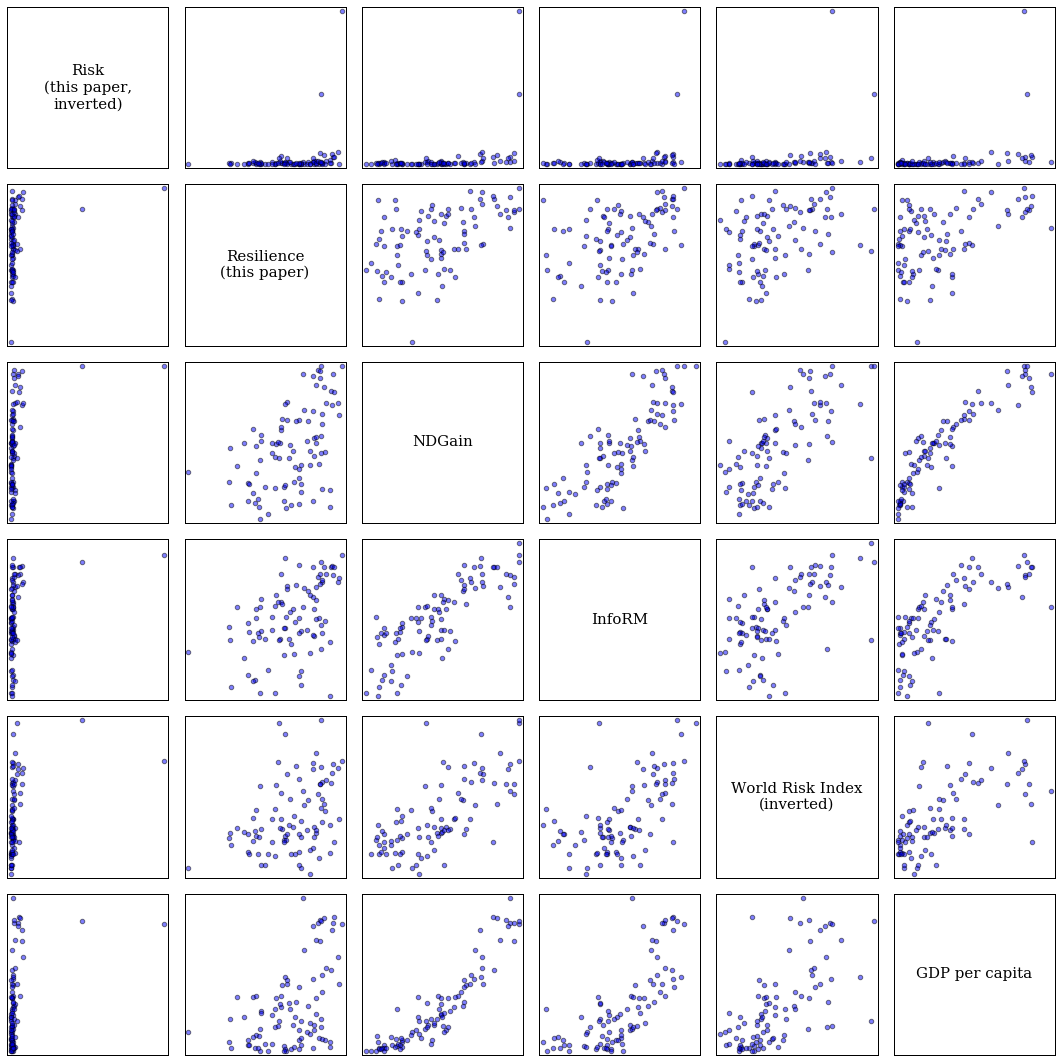

In [12]:
a=scatter_matrix(df[cols].rename(columns=coldict), figsize=(15, 15), diagonal='name', s=80);
for i in range(0,6):
    plt.text(.5,.5,df[cols].rename(columns=coldict).columns[i],transform=a[i,i].transAxes,ha="center",va="center")
    a[i,0].get_yaxis().set_ticks([])
    a[i,0].get_yaxis().set_label_text("")
    a[-1,i].get_xaxis().set_ticks([])
    a[-1,i].get_xaxis().set_label_text("")
savefig("img/comparison_of_indices.png",bbox_inches="tight")